
image 1/1 /home/angelo/Documentos/raspFlow/img_000045.jpg: 352x608 1 plate, 1 vehicle, 377.2ms
Speed: 13.2ms preprocess, 377.2ms inference, 17.4ms postprocess per image at shape (1, 3, 352, 608)


[W1010 19:28:11.826999010 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W1010 19:28:11.830704623 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W1010 19:28:11.833987878 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W1010 19:28:11.835203756 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.


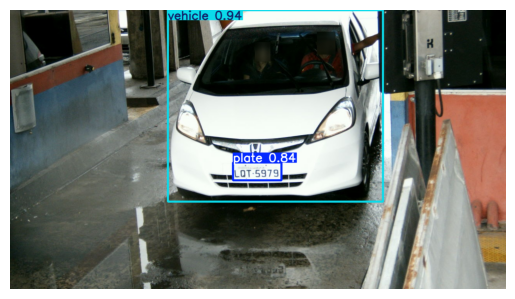

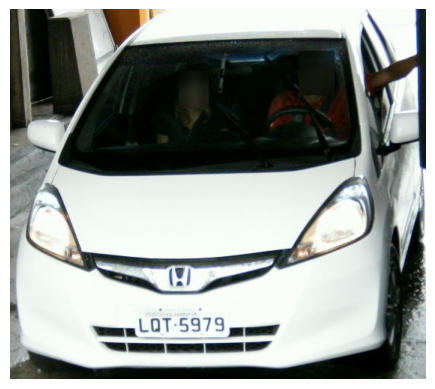

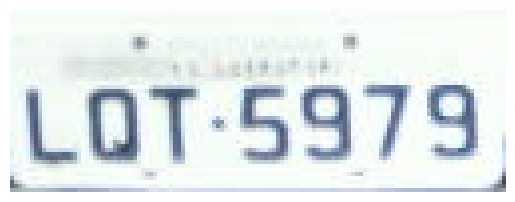

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Carrega o modelo
model = YOLO('v8n_augmentado_plate_vecicle.pt')

# Faz a predição
results = model.predict(
    source='img_000045.jpg',
    imgsz=608,  # múltiplo de 32
    conf=0.25
)

# Exibe no notebook
for r in results:
    img = r.plot()              # adiciona caixas e labels
    plt.imshow(img[..., ::-1])  # converte BGR → RGB
    plt.axis('off')
    plt.show()
    

    # Imagem original
    orig = r.orig_img

    # Loop sobre todas as detecções
    for box in r.boxes.xyxy:  # formato [xmin, ymin, xmax, ymax]
        xmin, ymin, xmax, ymax = map(int, box)
        plate_crop = orig[ymin:ymax, xmin:xmax]  # recorta

        # Mostra o recorte
        plt.imshow(plate_crop[..., ::-1])  # converte BGR → RGB
        plt.axis('off')
        plt.show()

In [2]:
from fast_plate_ocr import LicensePlateRecognizer

m = LicensePlateRecognizer('cct-xs-v1-global-model')
plate = m.run(plate_crop)[0]

In [3]:
import re

def get_plate(ocr_result: str) -> str | None:
    """
    Recebe o texto do OCR e retorna uma placa válida (Brasil) ou None.
    Suporta padrão antigo e Mercosul.
    """

    # Remove espaços extras e deixa tudo maiúsculo
    text = ocr_result.strip().upper()

    # Regex para padrão antigo (AAA-1234) e Mercosul (AAA1A23)
    pattern = r"[A-Z]{3}[- ]?\d{4}|[A-Z]{3}\d[A-Z]\d{2}"

    match = re.search(pattern, text)
    if match:
        return match.group(0).replace(" ", "").replace("-", "")
    return None

print(get_plate(plate))

LQT5979
